<a href="https://colab.research.google.com/github/DheerajDinesh/Cognorise_Infotech_AI/blob/main/COVID_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input ,Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid')

['train', 'test']

In [29]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/train/Covid'))

111

In [30]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/train/Normal'))

70

In [31]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/train/Viral Pneumonia'))

70

In [32]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Covid'))

26

In [33]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Normal'))

20

In [34]:
len(os.listdir('/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Viral Pneumonia'))

20

In [35]:
categories = ['Normal', 'Covid', 'Viral Pneumonia']
datadir_train = '/content/drive/MyDrive/CognoRise Infotech/AI/Covid/train'
datadir_test = '/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test'

In [36]:
img_gen = ImageDataGenerator(rescale = 1/255)
train_data = img_gen.flow_from_directory(datadir_train, target_size = (512,512), batch_size =32, class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [37]:
test_data = img_gen.flow_from_directory(datadir_test, target_size = (512,512), batch_size =1, class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [38]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [39]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [40]:
test_data.color_mode

'rgb'

In [41]:
test_data.filenames

['Covid/0100.jpeg',
 'Covid/0102.jpeg',
 'Covid/0105.png',
 'Covid/0106.jpeg',
 'Covid/0108.jpeg',
 'Covid/0111.jpg',
 'Covid/0112.jpg',
 'Covid/0113.jpg',
 'Covid/0115.jpeg',
 'Covid/0118.jpeg',
 'Covid/0119.jpeg',
 'Covid/0120.jpg',
 'Covid/094.png',
 'Covid/096.png',
 'Covid/098.jpeg',
 'Covid/COVID-00003b.jpg',
 'Covid/COVID-00012.jpg',
 'Covid/COVID-00022.jpg',
 'Covid/COVID-00033.jpg',
 'Covid/COVID-00037.jpg',
 'Covid/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Covid/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg',
 'Normal/0101.jpeg',
 'Normal/0102.jpeg',
 'Normal/0103.jpeg',
 'Normal/0105.jpeg',
 'Normal/0106.jpeg',
 'N

In [42]:
test_data.image_shape

(512, 512, 3)

In [43]:
model = Sequential()

model.add(Input(shape = (512,512,3)))

model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_data, epochs = 10, validation_data=(test_data))

Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 3.5491 - accuracy: 0.4622 - val_loss: 0.9904 - val_accuracy: 0.4394
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.7048 - accuracy: 0.7291 - val_loss: 0.7319 - val_accuracy: 0.6970
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.3596 - accuracy: 0.8685 - val_loss: 0.7232 - val_accuracy: 0.7424
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.2296 - accuracy: 0.9323 - val_loss: 0.2348 - val_accuracy: 0.9545
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.0860 - accuracy: 0.9761 - val_loss: 0.1849 - val_accuracy: 0.9394
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.0217 - accuracy: 0.9960 - val_loss: 0.2508 - val_accuracy: 0.9242
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.2006 - val_accuracy: 0.9697
Epoch 8/10
8/8 [======================

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 255, 255, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 64)      9280      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 128)      

In [46]:
model.evaluate(test_data)

66/66 [==============================] - 1s 18ms/step - loss: 0.3138 - accuracy: 0.9091


[0.3137653172016144, 0.9090909361839294]

In [58]:
model.evaluate(train_data)

8/8 [==============================] - 9s 1s/step - loss: 5.1098e-04 - accuracy: 1.0000


[0.0005109829362481833, 1.0]

In [67]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [71]:
def prediction(testing_image):

    # Load & Preprocess the Image
    test_img = image.load_img(testing_image, target_size = (512,512))
    test_img_arr = image.img_to_array(test_img) / 255
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # Make Prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]

    # Visulize the Image
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title(f'Predicted Label : {predicted_img}')
    plt.grid()
    plt.axis("off")

In [74]:
covid_test = '/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Covid/0106.jpeg'
normal_test = '/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Normal/0110.jpeg'
pneumonia_test = '/content/drive/MyDrive/CognoRise Infotech/AI/Covid/test/Viral Pneumonia/0120.jpeg'

1/1 [==============================] - 0s 39ms/step


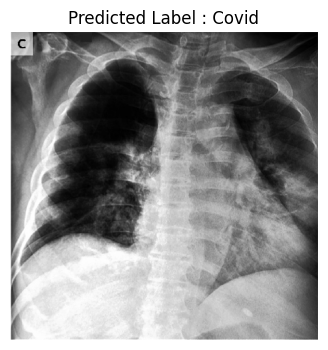

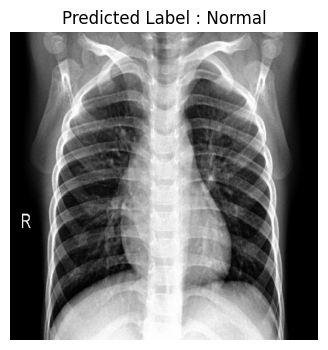

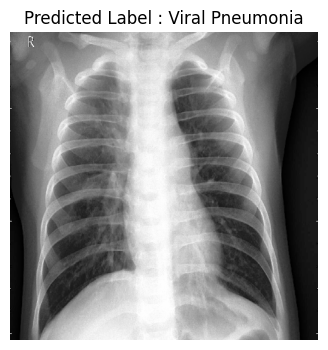

In [75]:
prediction(covid_test)
prediction(normal_test)
prediction(pneumonia_test)